In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import webbrowser
from selenium import webdriver
import requests 

from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
from time import sleep

# Librerias de tratamiento de datos y visualizaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import matplotlib.ticker as ticker
from tabulate import tabulate
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

# Librerías de funciones
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Varios
import multiprocessing
import random
from itertools import product
from sklearn.preprocessing import MinMaxScaler
import pickle
import joblib
import mplcursors

# Validacion
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Metricas para regresiones
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regresores
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df_final=pd.read_csv("final.csv")

In [3]:
df_final

,Marca,Modelo,Combustible,Provincia,Cv,Año,Kms,Precio
0,48,11332,0,7,75.0,2023,144.000,6.999
1,48,11316,0,7,80.0,2023,144.000,7.299
2,29,4802,3,52,8.0,2023,100.000,8.990
3,38,20043,8,49,75.0,2022,884.000,9.990
4,109,532,8,32,110.0,2022,120.000,10.499
...,...,...,...,...,...,...,...,...
239960,54,14081,0,26,136.0,2019,101.511,20.990
239961,119,4897,8,26,110.0,2021,61.664,19.540
239962,4,17428,0,34,116.0,2022,26.270,31.000
239963,122,14093,8,32,149.0,2021,25.972,25.500


In [4]:
df_final.isna().sum()

Marca          0
Modelo         0
Combustible    0
Provincia      0
Cv             0
Año            0
Kms            0
Precio         0
dtype: int64

In [5]:
df_final.columns

Index(['Marca', 'Modelo', 'Combustible', 'Provincia', 'Cv', 'Año', 'Kms',
       'Precio'],
      dtype='object')

In [6]:
df_final.info()
#tener encuenta quue las columnas categóricas aquí ya están modificadas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239965 entries, 0 to 239964
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Marca        239965 non-null  int64  
 1   Modelo       239965 non-null  int64  
 2   Combustible  239965 non-null  int64  
 3   Provincia    239965 non-null  int64  
 4   Cv           239965 non-null  float64
 5   Año          239965 non-null  int64  
 6   Kms          239965 non-null  float64
 7   Precio       239965 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 14.6 MB


In [7]:
train, test = train_test_split(df_final, test_size=0.3, random_state=42)

In [8]:
train.to_csv('train.csv', index = False)

In [9]:
test.to_csv('test.csv', index = False)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

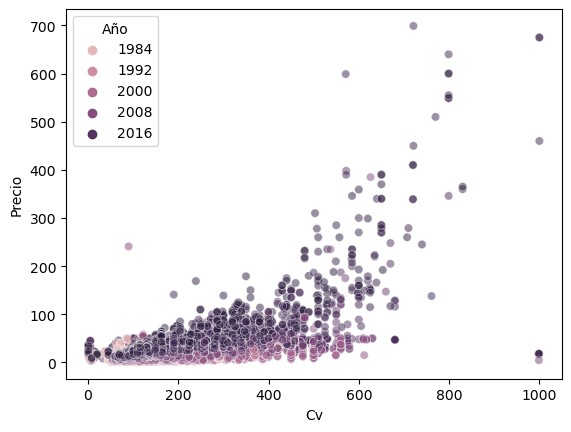

In [11]:
sns.scatterplot(x=df_final["Cv"], y=df_final["Precio"], hue=df_final["Año"], alpha= 0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

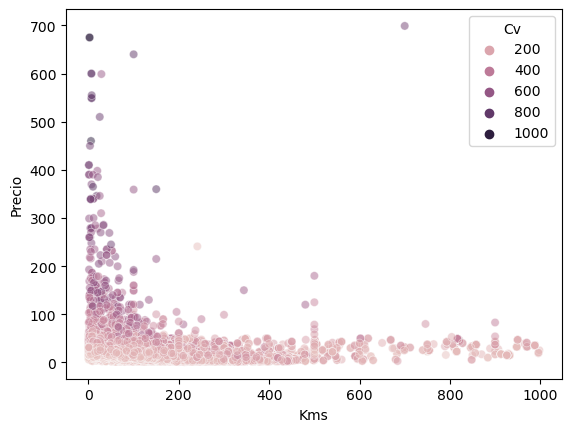

In [12]:
sns.scatterplot(x=df_final["Kms"], y=df_final["Precio"], hue=df_final["Cv"], alpha= 0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

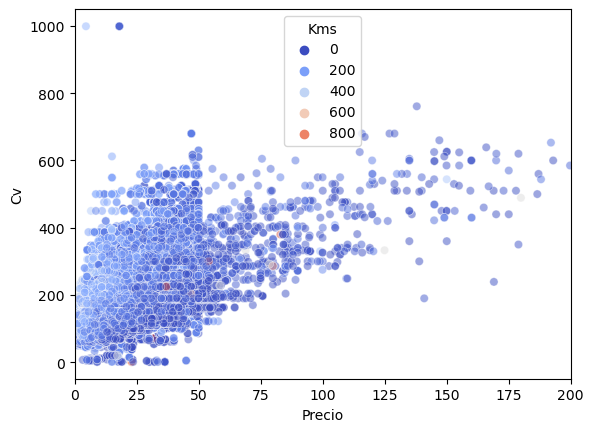

In [13]:
sns.scatterplot(x=df_final["Precio"], y=df_final["Cv"], hue=df_final["Kms"], alpha= 0.5, palette="coolwarm")
plt.xlim(0, 200)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

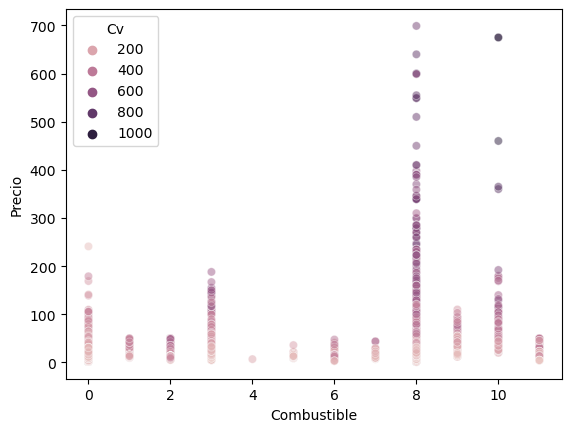

In [14]:
sns.scatterplot(x=df_final["Combustible"], y=df_final["Precio"], hue=df_final["Cv"], alpha= 0.5)
plt.show

In [15]:
modelos1 = [#LinearRegression(), 
           #KNeighborsRegressor(), 
           #RadiusNeighborsRegressor(), 
           #DecisionTreeRegressor(),
           RandomForestRegressor(), 
           #SVR(), 
           #AdaBoostRegressor(), 
           #GradientBoostingRegressor()
          ]

In [20]:
%%time
X = train.drop(["Precio"], axis = 1)
y = np.array(train["Precio"]).reshape(-1 , 1)

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

datos_modelos1 = list()

for model in modelos1:
    
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    
    y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1))
    yhat_inv = y_scaler.inverse_transform(yhat.reshape(-1, 1))
    
    # Metricas
    mae = mean_absolute_error(y_test_inv, yhat_inv)
    mse = mean_squared_error(y_test_inv, yhat_inv)
    r2 = r2_score(y_test_inv, yhat_inv)
    
    datos_modelos1.append([model, r2, x_scaler, y_scaler, str(model)])
    
df_modelo1 = pd.DataFrame(data = datos_modelos1, columns = ["Model", "r2", "X_scaler", "y_scaler","Name"])

df_modelo1.sort_values("r2", ascending = False)

CPU times: total: 34 s
Wall time: 1min 7s


,Model,r2,X_scaler,y_scaler,Name
0,"(DecisionTreeRegressor(max_features=1.0, rando...",0.954713,MinMaxScaler(),MinMaxScaler(),RandomForestRegressor()


In [21]:
with open (f"model.pkl", "bw") as file:
        
        pickle.dump(df_modelo1["Model"][0], file)

In [22]:
for model, x_scaler, y_scaler in df_modelo1[["Model", "X_scaler", "y_scaler"]]. values:
    
    with open (f"model.pkl", "bw") as file:
        
        pickle.dump(model, file)
        
    with open (f"x_scaler.pkl", "bw") as file:
        
        pickle.dump(x_scaler, file)
        
    with open (f"y_scaler.pkl", "bw") as file:
        
        pickle.dump(y_scaler, file)    
        

In [24]:
x_scaler.data_max_

array([1.4500e+02, 2.4586e+04, 1.1000e+01, 5.3000e+01, 1.0000e+03,
       2.0230e+03, 9.9800e+02])

In [ ]:
for r2 in df_modelo1[["r2"]]. values:
    
    with open (f"r2", "bw") as file:
        
        pickle.dump(r2, file)
        
    
        